<a href="https://colab.research.google.com/github/ficorrea/courses/blob/main/Preprocessamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tratando a base**


### Dicionário de dados:
#### Disponível em <https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dicionario-acidentes>
* **id**: Variável com valores numéricos, representando o identificador do acidente;
* **data_inversa**: Data da ocorrência no formato dd/mm/aaaa;
* **dia_semana**: Dia da semana da ocorrência. Ex.: Segunda, Terça, etc;
* **horario**: Horário da ocorrência no formato hh:mm:ss;
* **uf**: Unidade da Federação. Ex.: MG, PE, DF, etc;
* **br**: Variável com valores numéricos representando o identificador da BR do acidente;
* **km**: Identificação do quilômetro onde ocorreu o acidente, com
valor mínimo de 0,1 km e com a casa decimal separada
por ponto;
* **municipio**: Nome do município de ocorrência do acidente;
* **causa_acidente**: Identificação da causa presumível do acidente. Ex.: Falta de atenção, Velocidade incompatível, etc;
* **tipo_acidente**: Identificação do tipo de acidente. Ex.: Colisão frontal, Saída de pista,etc;
* **classificacao_acidente**: Classificação quanto à gravidade do acidente: Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais e Ignorado; 
* **fase_dia**: Fase do dia no momento do acidente. Ex. Amanhecer, Pleno dia, etc;
* **sentido_via**: Sentido da via considerando o ponto de colisão: Crescente e decrescente;
* **condicao_meteorologica**: Condição meteorológica no momento do acidente: Céu claro, chuva,vento,etc;
* **tipo_pista**: Tipo da pista considerando a quantidade de faixas:Dupla,simples ou múltipla;
* **tracado_via**: Descrição do traçado da via: reta, curva ou cruzamento;
* **uso_solo**: Descrição sobre as características do local do acidente: Urbano=Sim ou Rural=Não;
* **ano**: Ano da ocorrência;
* **pessoas**: Total de pessoas envolvidas na ocorrência;
* **mortos**: Total de pessoas mortas envolvidas na ocorrência;
* **feridos_leves**: Total de pessoas com ferimentos leves envolvidas na ocorrência;
* **feridos_graves**: Total de pessoas com ferimentos graves envolvidas na ocorrência;
* **ilesos**: Total de pessoas ilesas envolvidas na ocorrência;
* **ignorados**: Total de pessoas envolvidas na ocorrência e que não se soube o estado físico;
* **feridos**: Total de pessoas feridas envolvidas na ocorrência (é a soma dos feridos leves com os graves);
* **veiculos**: Total de veículos envolvidos na ocorrência;
* **latitude**: Latitude do local do acidente em formato geodésico
decimal;
* **longitude**: Longitude do local do acidente em formato geodésico
decimal;
* **regional**: - 
* **delegacia**: -
* **uop**: -

In [ ]:
import pandas as pd
import numpy as np
import math as mt
from unicodedata import normalize

In [ ]:
# Datasets concatenation

datasets = [f'/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/datatran{i}.csv' for i in range(2007, 2022)]
df_geral = pd.DataFrame()

for data in datasets:
    df_temp = pd.read_csv(data, sep=';', encoding='utf-8')
    df_geral = pd.concat([df_geral, df_temp], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Copy dataframe
df = df_geral.copy()

In [ ]:
# Dataset shape
df.shape

(1910652, 31)

In [ ]:
# Dataset check columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910652 entries, 0 to 1910651
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   data_inversa            object 
 2   dia_semana              object 
 3   horario                 object 
 4   uf                      object 
 5   br                      object 
 6   km                      object 
 7   municipio               object 
 8   causa_acidente          object 
 9   tipo_acidente           object 
 10  classificacao_acidente  object 
 11  fase_dia                object 
 12  sentido_via             object 
 13  condicao_metereologica  object 
 14  tipo_pista              object 
 15  tracado_via             object 
 16  uso_solo                object 
 17  ano                     float64
 18  pessoas                 int64  
 19  mortos                  int64  
 20  feridos_leves           int64  
 21  feridos_graves          int64  

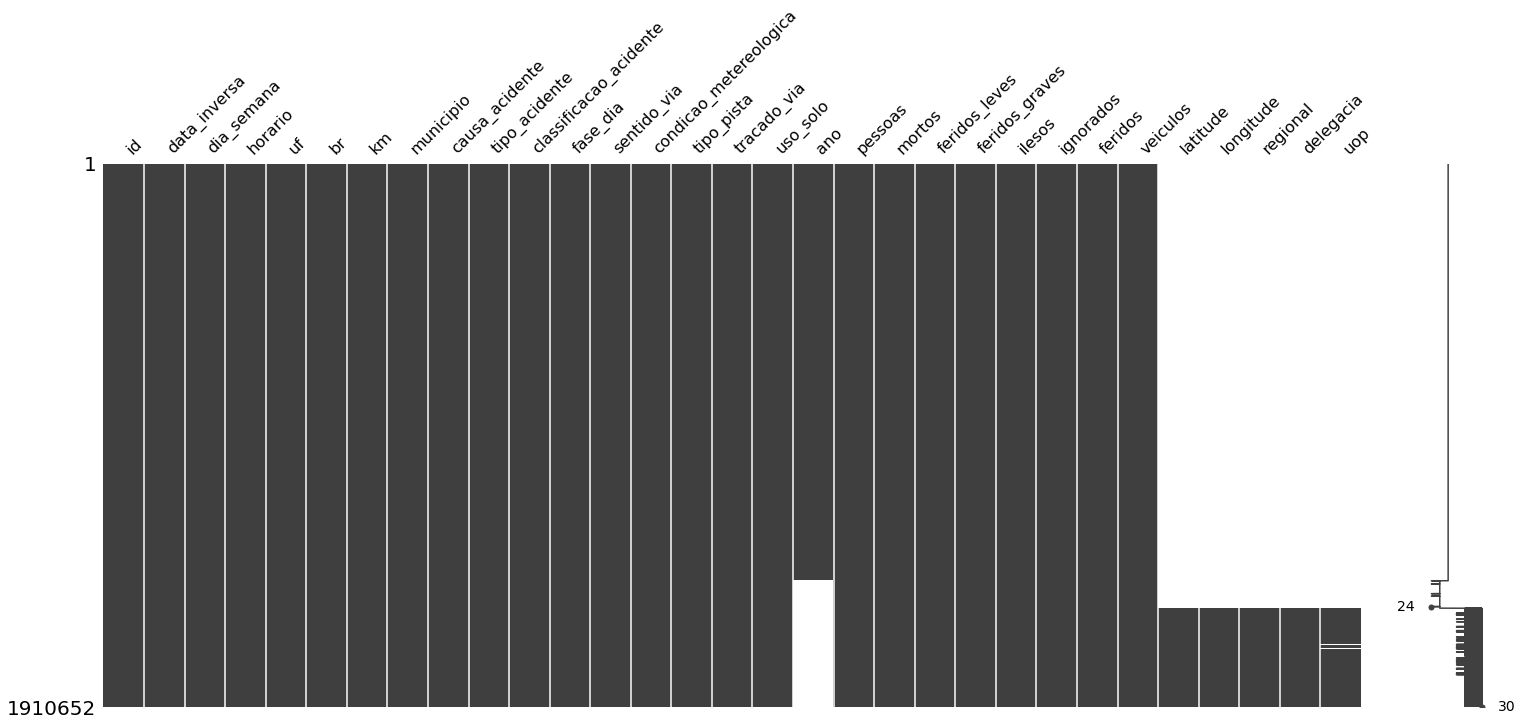

In [ ]:
# Using missingno package to check dataset health
import missingno as msno
msno.matrix(df)

In [ ]:
# Dataset head / tail
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,0,5,0,4,6,NaN,NaN,NaN,NaN,NaN
1,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,0,5,0,4,6,NaN,NaN,NaN,NaN,NaN
2,1032898.0,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,1,2,0,1,1,NaN,NaN,NaN,NaN,NaN
3,1051130.0,12/02/2007,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,1,0,0,3,1,NaN,NaN,NaN,NaN,NaN
4,1066824.0,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1910647,400834.0,2021-10-31,domingo,20:50:00,RJ,101.0,308,SAO GONCALO,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,1,0,1,2,-22.793093,-43.024796,SR-RJ,UOP02,DEL02
1910648,400858.0,2021-10-15,sexta-feira,19:40:00,RJ,465.0,15,SEROPEDICA,Deficiência do Sistema de Iluminação/Sinalização,Colisão frontal,...,0,1,2,1,2,-22.810925,-43.631504,SR-RJ,UOP03,DEL01
1910649,400868.0,2021-10-10,domingo,09:30:00,AC,317.0,67,SENADOR GUIOMARD,Ausência de reação do condutor,Colisão frontal,...,1,1,1,1,2,-10.052653,-67.557347,SR-AC,UOP01,DEL01
1910650,400970.0,2021-02-10,quarta-feira,23:40:00,PR,376.0,318,ORTIGUEIRA,Afundamento ou ondulação no pavimento,Colisão com objeto,...,0,0,1,1,1,-24.041498,-51.076469,SR-PR,UOP02,DEL07
1910651,402083.0,2021-11-22,segunda-feira,15:00:00,MG,251.0,460,FRANCISCO SA,Chuva,Saída de leito carroçável,...,0,0,0,4,1,-16.418109,-43.38361,SR-MG,UOP01,DEL12


In [ ]:
# Check ID duplicity
id_duplicity = df.groupby('id', as_index=False).agg({'id': ['first', 'count']})
ids_duplicity = id_duplicity[id_duplicity[('id', 'count')] > 1][('id', 'first')].values.tolist()
len(ids_duplicity)

173137

In [ ]:
df[df.id == ids_duplicity[0]]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
1174483,8.0,2014-11-22,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,Saída de Pista,...,0,3,0,0,3,NaN,NaN,NaN,NaN,NaN
1174484,8.0,2014-11-22,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,Saída de Pista,...,0,3,0,0,3,NaN,NaN,NaN,NaN,NaN
1562200,8.0,2017-01-01,domingo,00:00:00,PR,376.0,112,PARANAVAI,Fenômenos da Natureza,Queda de ocupante de veículo,...,1,0,0,1,1,"-23,09880731","-52,38789369",SR-PR,DEL7/7,UOP05/PR


In [ ]:
# Columns NaN
df[(df.br == '(null)') | (df.br.isna())]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
35299,217981.0,18/04/2007,Quarta,17:00:00,(null),(null),(null),TERRA NOVA DO NORTE,Outras,Colisão frontal,...,2,2,0,2,2,NaN,NaN,NaN,NaN,NaN
51672,238324.0,08/06/2007,Sexta,07:40:00,(null),(null),(null),GUARANTA DO NORTE,Ultrapassagem indevida,Colisão frontal,...,1,0,0,2,2,NaN,NaN,NaN,NaN,NaN
69918,260039.0,30/07/2007,Segunda,19:30:00,(null),(null),(null),MATUPA,Ingestão de álcool,Colisão frontal,...,1,1,0,1,2,NaN,NaN,NaN,NaN,NaN
70962,261456.0,01/08/2007,Quarta,13:00:00,(null),(null),(null),GUARANTA DO NORTE,Outras,Colisão Transversal,...,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN
87375,280321.0,20/09/2007,Quinta,19:30:00,(null),(null),(null),MATUPA,Animais na Pista,Atropelamento de animal,...,0,0,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908714,396978.0,2021-11-20,sábado,17:20:00,MG,NaN,NaN,ABRE CAMPO,Velocidade Incompatível,Colisão lateral mesmo sentido,...,0,3,0,0,3,-20.296548,-42.478366,SR-MG,UOP03,DEL03
1909335,397646.0,2021-11-19,sexta-feira,12:00:00,RO,NaN,NaN,PORTO VELHO,Acessar a via sem observar a presença dos outr...,Colisão lateral mesmo sentido,...,0,3,0,0,2,-8.0,-63.0,SR-RO,RO,SPRF-RO
1910050,398406.0,2021-11-27,sábado,12:10:00,MS,NaN,NaN,CAARAPO,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,4,0,0,2,-22.653231,-54.817937,SR-MS,UOP01,DEL04
1910453,398838.0,2021-11-30,terça-feira,12:15:00,RO,NaN,NaN,PORTO VELHO,Chuva,Engavetamento,...,0,3,0,0,3,-8.735039,-63.878642,SR-RO,UOP01,DEL01


### **Conclusions**
* Must be necessary:
    * Convert feature **id** from float to str;
    * Fill features **br**, **km**, **regional**, **delegacia** and **uop**;
    * Convert feature **br** from float to str;
    * Truncate feature **km**;
    * Create a interval of 50km from feature **km**, eg: if km = 67 the interval must be 50 - 100;
    * Adjust feature **data_inversa** to format aaaa-mm-dd;
    * Adjust feature **dia_semana** to only first name and capitalize, eg: SABADO, SEGUNDA, etc;
    * Remove accentuation from features **dia_semana**, **causa_acidente**, **tipo_acidente**, **classificacao_acidente**, **fase_dia**, **condicao_metereologica**, **tipo_pista**, **tracado_via** e **uso_solo**;
    * Capitalize features **dia_semana**, **causa_acidente**, **tipo_acidente**, **classificacao_acidente**, **fase_dia**, **sentido_via**, **condicao_metereologica**, **tipo_pista**, **tracado_via** e **uso_solo**;
    * Fill feature **ano** with respective year where is null and convert to int;
    * Check duplicity into **id** column, some duplications came from same id but different years;
    * Features **latitude**, **longitude** are written with ' , ' change to ' . ' and convert to float;
    * Check features **latitude**, **longitude** and fill nan values;
    * Add **mes** field;




In [ ]:
# Convert features id
df['id'] = df.id.astype(int).astype(str)

In [ ]:
# Fillna features br, km, regional, delegacia and uop
values = {'br': '0', 'km': '-1', 'regional': 'UNKNOWN', 'delegacia': 'UNKNOWN', 'uop': 'UNKNOWN'}
df.fillna(values, inplace=True)

In [ ]:
# Convert features br and km
df.loc[df.br == '(null)', 'br'] = '0'
df['br'] = df.br.astype(int).astype(str)

df.loc[df.km == '(null)', 'km'] = '-1'
df['km'] = df.apply(lambda x: x.km.replace(',', '.') if isinstance(x.km, str) else x.km, axis=1)
df['km'] = df.km.astype(float).astype(int)

In [ ]:
# Create a km_interval
def gen_interval(x, num_interval):
    int_min = x - x % num_interval
    int_max = int_min + num_interval
    return f'[{int_min} - {int_max}]'

df['km_intervalo'] = df.apply(lambda x: gen_interval(x.km, 50), axis=1)

In [ ]:
# Adjust feature data_inversa to format aaaa-mm-dd
df['data_inversa'] = pd.to_datetime(df.data_inversa, dayfirst=True)

In [ ]:
# Adjust feature dia_semana to only first name and capitalize, eg: SABADO, SEGUNDA, etc
df['dia_semana'] = df.apply(lambda x: x.dia_semana.split('-')[0].upper(), axis=1)

In [ ]:
# Remove nan values
fill_value = '(null)'

df.fillna({'dia_semana': fill_value,
           'causa_acidente': fill_value, 
           'tipo_acidente':fill_value, 
           'classificacao_acidente': fill_value, 
           'fase_dia': fill_value, 
           'condicao_metereologica': fill_value, 
           'tipo_pista': fill_value, 
           'tracado_via': fill_value, 
           'uso_solo': fill_value}, inplace=True)

# Remove accentuation and capitalize strings
def remove_accents(x):
    return normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII').upper()

df = (
    df
    .assign(dia_semana = df.apply(lambda x: remove_accents(x.dia_semana), axis=1))
    .assign(causa_acidente = df.apply(lambda x: remove_accents(x.causa_acidente), axis=1))
    .assign(tipo_acidente = df.apply(lambda x: remove_accents(x.tipo_acidente), axis=1))
    .assign(classificacao_acidente = df.apply(lambda x: remove_accents(x.classificacao_acidente), axis=1))
    .assign(fase_dia = df.apply(lambda x: remove_accents(x.fase_dia), axis=1))
    .assign(condicao_metereologica = df.apply(lambda x: remove_accents(x.condicao_metereologica), axis=1))
    .assign(tipo_pista = df.apply(lambda x: remove_accents(x.tipo_pista), axis=1))
    .assign(tracado_via = df.apply(lambda x: remove_accents(x.tracado_via), axis=1))
    .assign(uso_solo = df.apply(lambda x: remove_accents(x.uso_solo), axis=1))
)

In [ ]:
# Fill feature ano
df['ano'] = df.apply(lambda x: x.data_inversa.year, axis=1)

In [ ]:
# Check ID duplicity
id_duplicity = df.groupby(['id', 'ano'], as_index=False).agg({'id': ['first', 'count'], 'ano': 'first'})
ids_duplicity = id_duplicity[id_duplicity[('id', 'count')] > 1][('id', 'first')].values.tolist()
print(f' Was found: {len(ids_duplicity)} duplicate ids')

# Remove duplicity
df.drop_duplicates(subset=['id', 'ano'], keep='first', inplace=True)

 Was found: 35 duplicate ids


In [ ]:
# Change longitude and latitude fields type
df['longitude'] = df.apply(lambda x: x.longitude if isinstance(x.longitude, float) else x.longitude.replace(',', '.'), axis=1)
df['latitude'] = df.apply(lambda x: x.latitude if isinstance(x.latitude, float) else x.latitude.replace(',', '.'), axis=1)

df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

In [ ]:
# Fill latitude and longitude
df_temp = (
    df
    .groupby(['br', 'km_intervalo'], as_index=False)
    .agg({'longitude': 'mean', 'latitude': 'mean'})
)

df_temp.rename(columns={'longitude': 'temp_long', 'latitude': 'temp_lati'}, inplace=True)

# Joining tables
df = df.merge(df_temp, on=['br', 'km_intervalo'], how='left')

df = (
    df
    .assign(longitude = df.apply(lambda x: x.temp_long if (np.isnan(x.longitude) and not np.isnan(x.temp_long)) else 0, axis=1))
    .assign(latitude = df.apply(lambda x: x.temp_lati if (np.isnan(x.latitude) and not np.isnan(x.temp_lati)) else 0, axis=1))
)

# Remove unnecessary columns
df.drop(columns=['temp_long', 'temp_lati'], inplace=True)

In [ ]:
# Add feature mes
df['mes'] = df.apply(lambda x: x.data_inversa.month, axis=1)

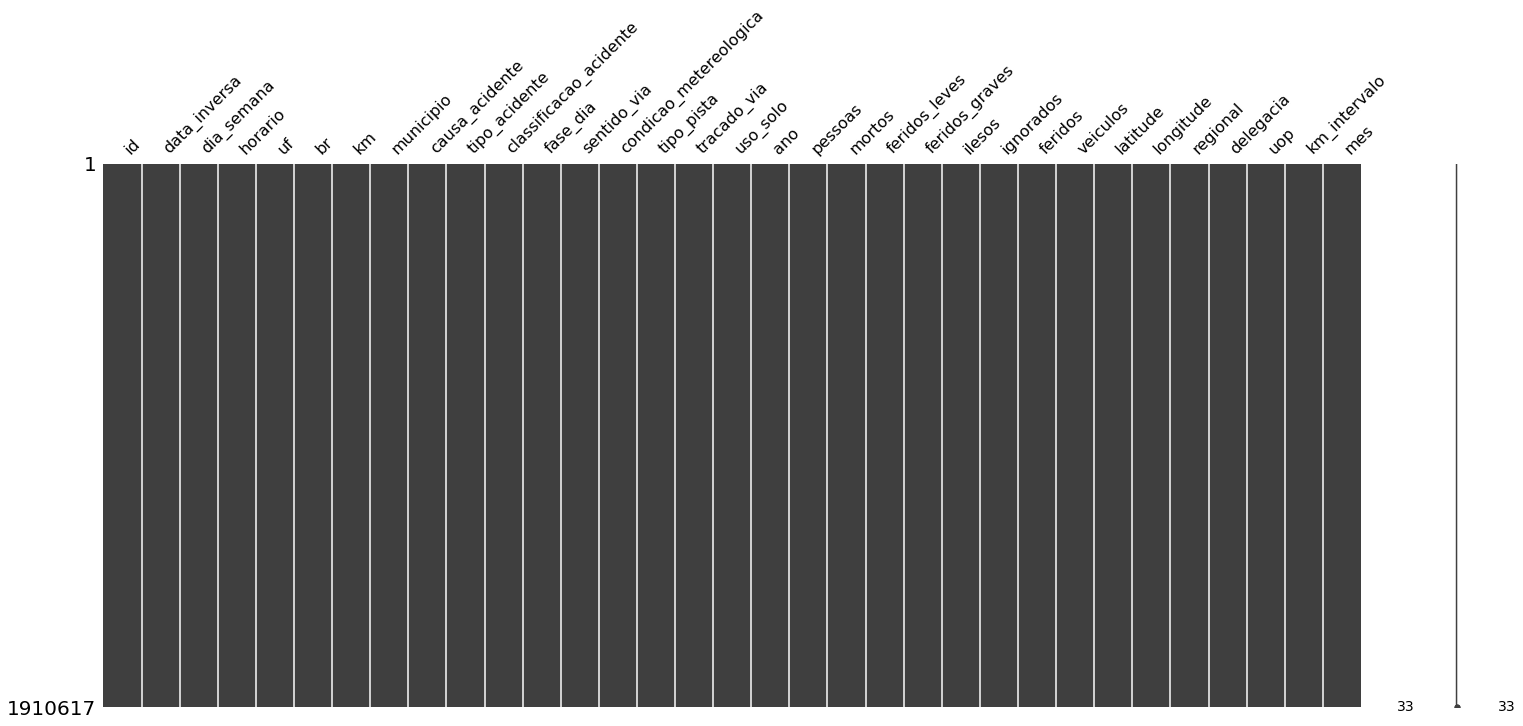

In [ ]:
# Final dataset health
import missingno as msno
msno.matrix(df)

In [ ]:
# Save dataframe preprocessed
df.to_csv('/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/df_preprocessed.csv', index=False, encoding='utf-8')